<a href="https://colab.research.google.com/github/EllaisJung/EllaisJung/blob/main/coba%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [61]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Unzip Datasest

In [62]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [63]:
link = "https://drive.google.com/file/d/1T4LeX4JBrF3ydKeOTjXvo4aa75Fwop-8/view?usp=sharing"

In [64]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

1T4LeX4JBrF3ydKeOTjXvo4aa75Fwop-8


In [65]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('Datasets.zip')

In [66]:
zip_file = 'Datasets.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall()
zip_ref.close()

#Exploratory Data Analysis

In [67]:
folder_dir = 'Datasets'
print("Contents of base directory:")
print(os.listdir(folder_dir))

print("\nContents of train directory:")
print(os.listdir(f'{folder_dir}/Train'))

print("\nContents of test directory:")
print(os.listdir(f'{folder_dir}/Test'))

Contents of base directory:
['Test', 'Train']

Contents of train directory:
['Sourdough', 'Croissant ', 'Baguette', 'Bagel', 'Biscuits', 'Mantou', 'Naan', 'Focaccia', 'English Muffin', 'Pretzel']

Contents of test directory:
['Sourdough', 'Croissant ', 'Baguette', 'Bagel', 'Biscuits', 'Mantou', 'English Muffin ', 'Naan', 'Focaccia', 'Pretzel']


In [68]:
train_dir = os.path.join(folder_dir, 'Train')
test_dir = os.path.join(folder_dir, 'Test')

#Directory of food training images
train_mantou_dir = os.path.join(train_dir, 'Mantou')
train_sourdough_dir = os.path.join(train_dir, 'Sourdough')
train_bagel_dir = os.path.join(train_dir, 'Bagel')
train_baguette_dir = os.path.join(train_dir, 'Baguette')
train_focaccia_dir = os.path.join(train_dir, 'Focaccia')
train_pretzel_dir = os.path.join(train_dir, 'Pretzel')
train_naan_dir = os.path.join(train_dir, 'Naan')
train_english_muffin_dir = os.path.join(train_dir, 'English Muffin')
train_biscuits_dir = os.path.join(train_dir, 'Biscuits')
train_croissant_dir = os.path.join(train_dir, 'Croissant ')

In [69]:
#Directory of food testing images
test_mantou_dir = os.path.join(test_dir, 'Mantou')
test_sourdough_dir = os.path.join(test_dir, 'Sourdough')
test_bagel_dir = os.path.join(test_dir, 'Bagel')
test_baguette_dir = os.path.join(test_dir, 'Baguette')
test_focaccia_dir = os.path.join(test_dir, 'Focaccia')
test_pretzel_dir = os.path.join(test_dir, 'Pretzel')
test_naan_dir = os.path.join(test_dir, 'Naan')
test_english_muffin_dir = os.path.join(test_dir, 'English Muffin ')
test_biscuits_dir = os.path.join(test_dir, 'Biscuits')
test_croissant_dir = os.path.join(test_dir, 'Croissant ')

In [70]:
train_mantou_filenames = os.listdir(train_mantou_dir)
train_sourdough_filenames = os.listdir(train_sourdough_dir)
train_bagel_filenames = os.listdir(train_bagel_dir)
train_baguette_filenames = os.listdir(train_baguette_dir)
train_focaccia_filenames = os.listdir(train_focaccia_dir)
train_pretzel_filenames = os.listdir(train_pretzel_dir)
train_naan_filenames = os.listdir(train_naan_dir)
train_english_muffin_filenames = os.listdir(train_english_muffin_dir)
train_biscuits_filenames = os.listdir(train_biscuits_dir)
train_croissant_filenames = os.listdir(train_croissant_dir)

In [71]:
test_mantou_filenames = os.listdir(test_mantou_dir)
test_sourdough_filenames = os.listdir(test_sourdough_dir)
test_bagel_filenames = os.listdir(test_bagel_dir)
test_baguette_filenames = os.listdir(test_baguette_dir)
test_focaccia_filenames = os.listdir(test_focaccia_dir)
test_pretzel_filenames = os.listdir(test_pretzel_dir)
test_naan_filenames = os.listdir(test_naan_dir)
test_english_muffin_filenames = os.listdir(test_english_muffin_dir)
test_biscuits_filenames = os.listdir(test_biscuits_dir)
test_croissant_filenames = os.listdir(test_croissant_dir)

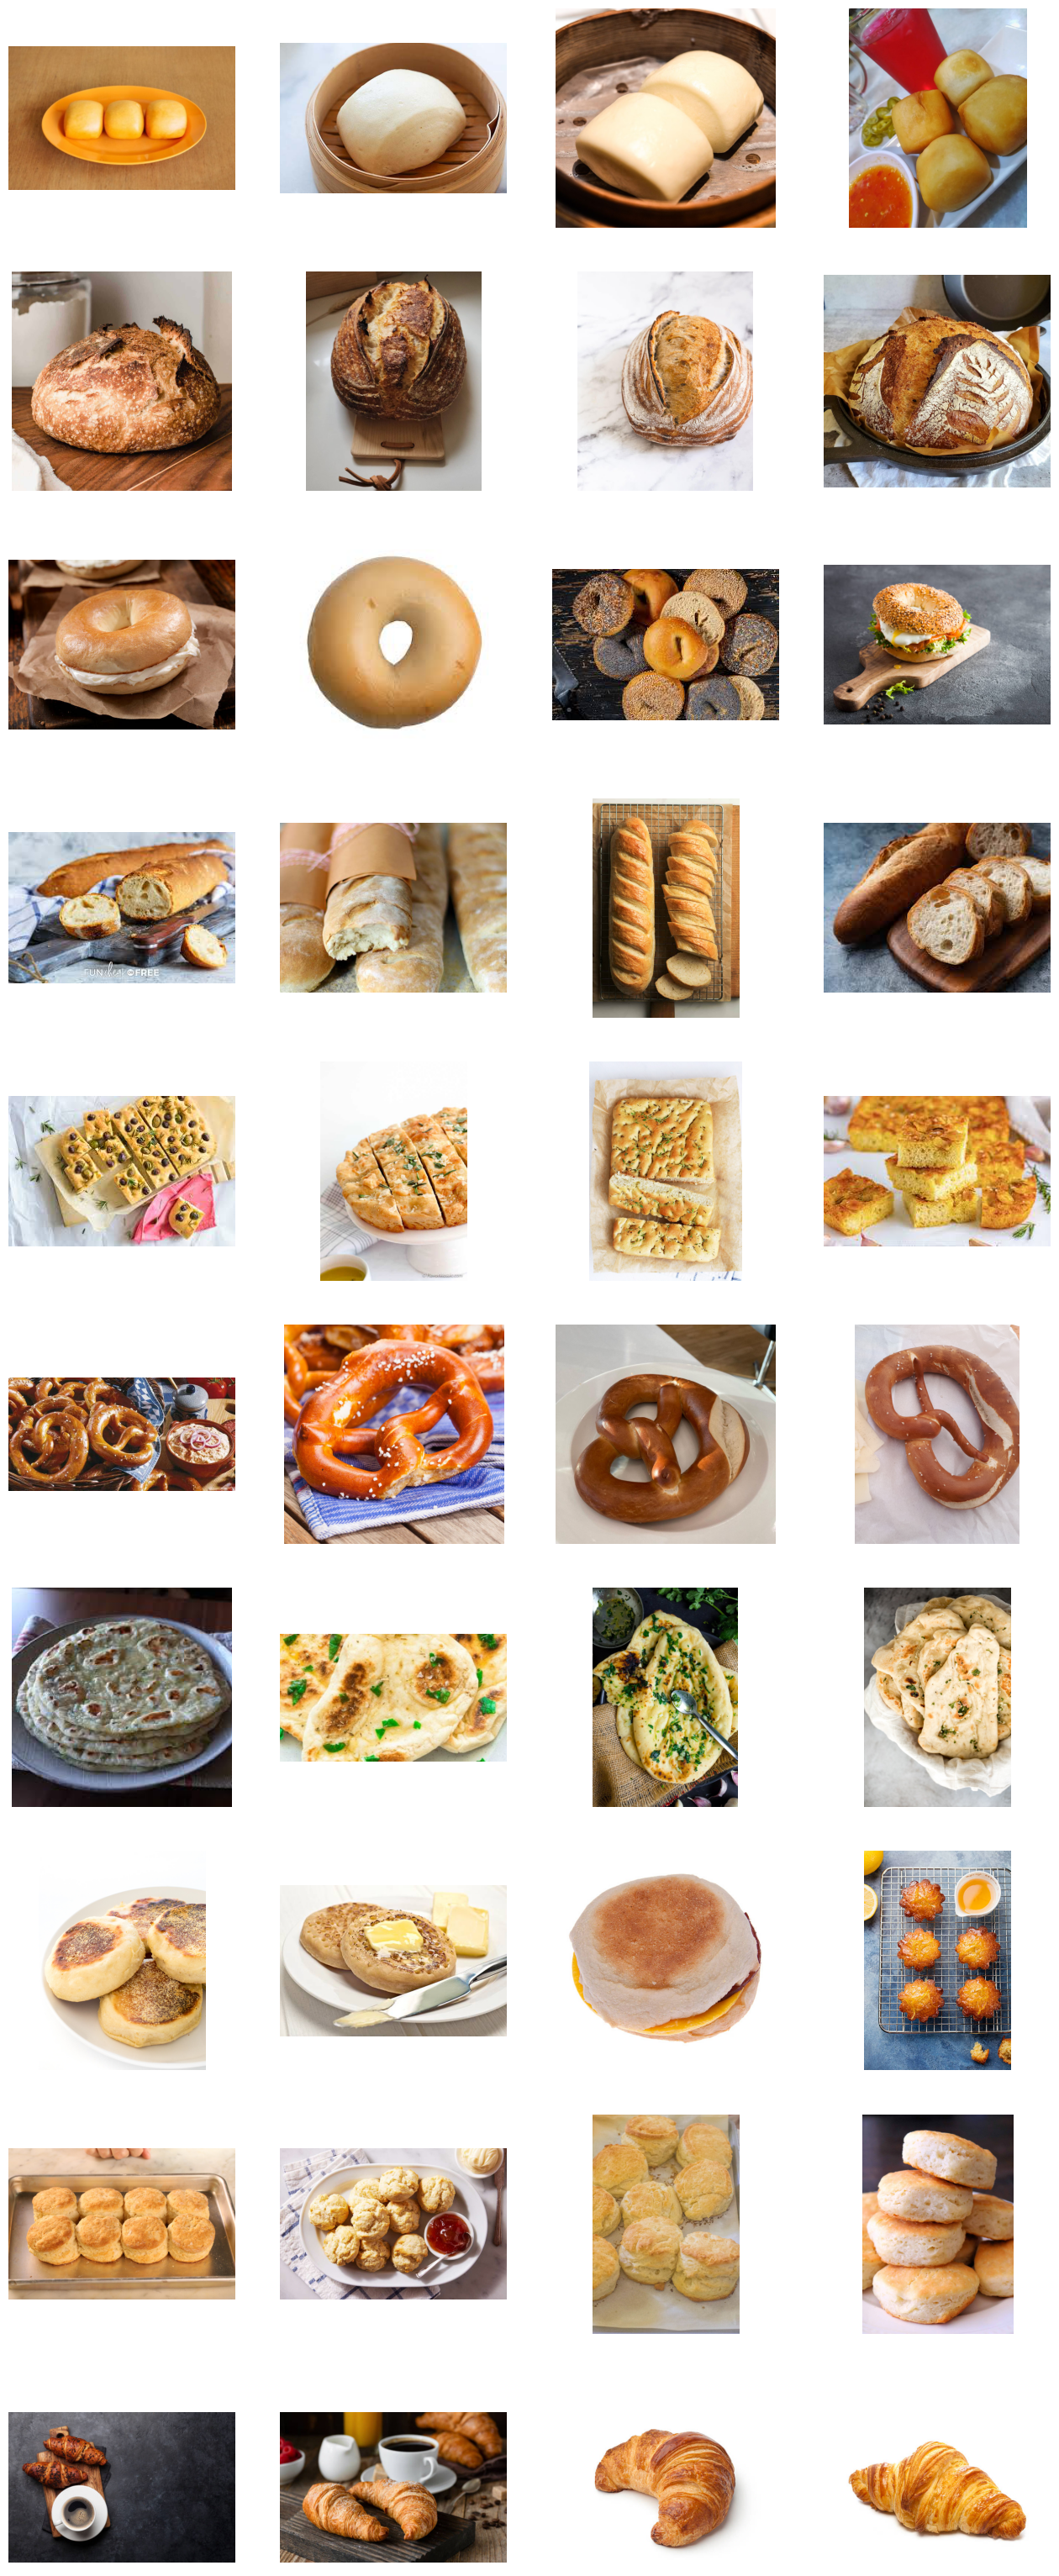

In [72]:
%matplotlib inline

nrows = 10
ncols = 4

pic_index = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_mantou = [os.path.join(train_mantou_dir, filename)
                   for filename in train_mantou_filenames[pic_index-4:pic_index]
                  ]
next_sourdough = [os.path.join(train_sourdough_dir, filename)
                   for filename in train_sourdough_filenames[pic_index-4:pic_index]
                  ]
next_bagel = [os.path.join(train_bagel_dir, filename)
                   for filename in train_bagel_filenames[pic_index-4:pic_index]
                  ]
next_baguette = [os.path.join(train_baguette_dir, filename)
                   for filename in train_baguette_filenames[pic_index-4:pic_index]
                  ]
next_focaccia = [os.path.join(train_focaccia_dir, filename)
                   for filename in train_focaccia_filenames[pic_index-4:pic_index]
                  ]
next_pretzel = [os.path.join(train_pretzel_dir, filename)
                   for filename in train_pretzel_filenames[pic_index-4:pic_index]
                  ]
next_naan = [os.path.join(train_naan_dir, filename)
                   for filename in train_naan_filenames[pic_index-4:pic_index]
                  ]
next_english_muffin = [os.path.join(train_english_muffin_dir, filename)
                   for filename in train_english_muffin_filenames[pic_index-4:pic_index]
                  ]
next_biscuits = [os.path.join(train_biscuits_dir, filename)
                   for filename in train_biscuits_filenames[pic_index-4:pic_index]
                  ]
next_croissant = [os.path.join(train_croissant_dir, filename)
                   for filename in train_croissant_filenames[pic_index-4:pic_index]
                  ]
for i, img_path in enumerate(next_mantou + next_sourdough + next_bagel + 
                             next_baguette + next_focaccia + next_pretzel +
                             next_naan + next_english_muffin + next_biscuits + next_croissant ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Image Augmentation




In [73]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(300,300),
                  class_mode='categorical',
                  batch_size= 20)

test_datagen = ImageDataGenerator(rescale=1./255)
                                    
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(300,300),
                 class_mode='categorical',
                 batch_size= 20)

Found 1480 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


#Transfer Learning

In [74]:
from keras.applications.mobilenet_v2 import MobileNetV2

tflr_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet')

tflr_model.trainable = False
# for layer in base_model.layers:
#   layer.trainable = False

tflr_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

#Train Model

In [75]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model

i = tf.keras.layers.Input(shape=(224, 224, 3))

x = tflr_model(i, training=False)
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
o = tf.keras.layers.Dense(10, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(i, o) 

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dense_14 (Dense)            (None, 512)               32113152  
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                           

In [76]:
learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [77]:
history = model.fit (train_generator,
                     steps_per_epoch= 1480/20,
                     epochs= 10,
                     validation_data= test_generator,
                     validation_steps = 372/20,
                     verbose = 2)

Epoch 1/10


InvalidArgumentError: ignored

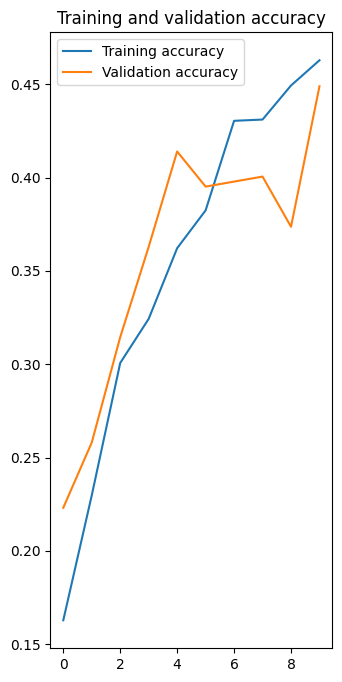

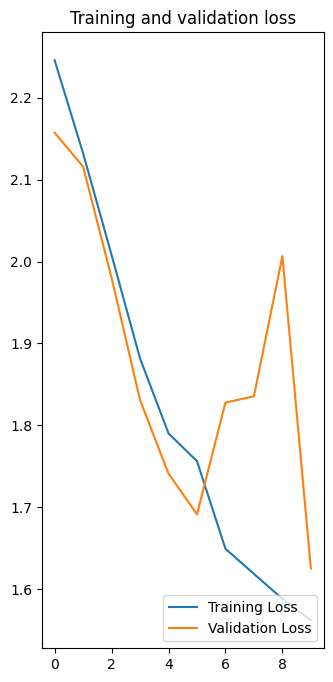

In [ ]:
def plot_loss_acc(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.legend(loc='upper left')
  plt.title('Training and validation accuracy')

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='lower right')
  plt.title('Training and validation loss')
 
  plt.show()
# Plot training results
plot_loss_acc(history)